<a href="https://colab.research.google.com/github/stefancosquer/deep-learning-101/blob/master/Deep_Learning_par_la_pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quickstart

Ce notebook présente les différentes étapes de création des réseaux de neurones profonds, en particulier ceux dédier à la reconnaissance d'image.

Afin de pouvoir modifier le notebook, enregistrez une copie dans votre drive (Fichier > Enregistrez une copie dans Drive...)

## Afficher les devices

Colaboratory permet d'utiliser gratuitement et pendant 12h un GPU de type Tesla K80, alors profitons en !

A noter que Google Colaboratory met également à disposition un accélérateur TPU.

La commande ci-dessous permet de vérifier la présence du GPU.


In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

## Installation 

Quelques dépendances à installer :

*  Tensorflow
*  Keras
*  ...

La plupart de ces dépendances sont déjà installées sur Colaboratory, donc ce bloc est plus là pour ceux qui souhaiteraient installer la stack de développement sur un environnement dédié.

In [0]:
!pip install tensorflow
!pip install keras
!pip install pillow
!pip install matplotlib


In [0]:
!pip list

## XOR


#### Présentation

Le but de cette section est de créer un premier réseau de neurones avec Keras.

Ce réseau nous permettra de résoudre un problème non linéraire simple.

![](https://cdn-images-1.medium.com/max/1600/1*Tc8UgR_fjI_h0p3y4H9MwA.png)


#### Jeu de données

Le jeu de donnée est simple :

*  x : entrées du réseau
*  y : sorties correspondantes

In [0]:
import numpy as np

x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

#### Création du modèle

On crée ici un modèle simple avec une couche de neurones cachés complètement connectés.

![](https://cdn-images-1.medium.com/max/479/1*QVIyc5HnGDWTNX3m-nIm9w.png)

Quelques paramètres pour jouer :

*  le nombre de couches !
*  le nombre de neurones par couche.
*  la fonction d'activation : relu, tanh, sigmoid, ...
*  le type d'optimizer : adam, sgd, ...

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(16, input_dim=2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.summary();

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


#### Apprentissage

On entraine ici le réseau.

Quelques paramètres pour jouer :

*  batch_size : le nombre d'échantillons fournis au réseau avant chaque rétropropagation
*  epochs : le nombre de fois qu'on présente le jeu de données complet


<img src="https://i.stack.imgur.com/lU3sx.png" width="600">


In [0]:
history = model.fit(x, y, batch_size=4, epochs=1000, verbose=0)

#### Affichage de la courbe d'apprentissage (évaluation)

Afin d'évaluer la qualité de l'apprentissage, le plus simple est d'afficher l'historique.

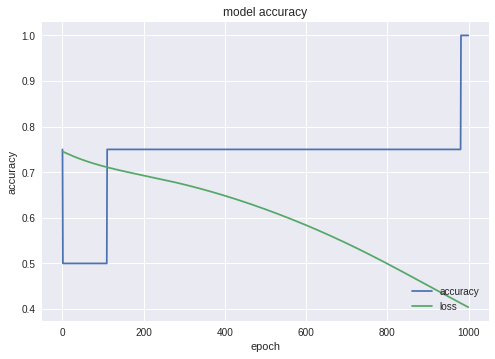

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='lower right')
plt.show()

Prédiction des probabilités.

In [0]:
print(model.predict_proba(x))

[[0.2573802 ]
 [0.8499613 ]
 [0.50610477]
 [0.3767453 ]]


Prédiction des classes.

In [0]:
print(model.predict_classes(x))

[[0]
 [1]
 [1]
 [0]]


On peut sauvegarder le modèle ainsi que ses poids afin de le déployer.

In [0]:
model.save('./xor.h5')

# Réseaux de neurones convolutifs (CNN)


## Présentation


### Principe de fonctionnement

![](https://heuritech.files.wordpress.com/2016/02/vgg16.png)

#### Convolution

Image 

![](https://cdn-images-1.medium.com/max/1600/0*JsCxaZb5AIm6YFlB)

Filtre

![](https://cdn-images-1.medium.com/max/1600/0*TG6RffpzcJBzYsEk)

Fonctionnement 

![](https://cdn-images-1.medium.com/max/1600/0*KdJv2eWBC1qUs3Po)

#### Pooling

<img src="https://cdn-images-1.medium.com/max/1600/0*6ED-178t3tjE0Wo6" width="600">

#### Flattening

La matrice à 2 dimensions est transformée en matrice à 1 dimension.



### Implémentations dans Keras

[Applications Keras](https://github.com/keras-team/keras-applications)

| Modèle | Images | Poids | Top-1 | Top-5 | Paramètres | Profondeur  | 
|-|-|-|-|-|-|-|-|
|Xception|299 x 299|88 MB|0.790|0.945|22,910,480|126|
|VGG16|224 x 224|528 MB|0.715|0.901|138,357,544|23|
|VGG19|224 x 224|549 MB|0.727|0.910|143,667,240|26|
|ResNet50|224 x 224|99 MB|0.759|0.929|25,636,712|168|
|InceptionV3|299 x 299|92 MB|0.788|0.944|23,851,784|159|
|InceptionResNetV2|299 x 299|215 MB|0.804|0.953|55,873,736|572|
|MobileNet|224 x 224|17 MB|0.665|0.871|4,253,864|88|



#### VGG16

In [0]:
from google.colab import files
from keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
from keras.preprocessing.image import load_img, img_to_array

# upload file to Colab
file = list(files.upload().keys())[0]

# load and display ANN
model = VGG16(weights='imagenet', include_top=True)
model.summary()

# load an image from file
image = load_img(file, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

# predict
predictions = model.predict(image)
print(predictions)
# convert the probabilities to class labels
print(decode_predictions(predictions))


Using TensorFlow backend.


Saving _0_7389479.png to _0_7389479 (2).png
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (No

#### Xception

In [0]:
from google.colab import files
from keras.applications.xception import Xception, decode_predictions, preprocess_input
from keras.preprocessing.image import load_img, img_to_array

# upload file to Colab
file = list(files.upload().keys())[0]

# load and display ANN
model = Xception(weights='imagenet', include_top=True)
model.summary()

# load an image from file
image = load_img(file, target_size=(299, 299))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the Xception model
image = preprocess_input(image)

# predict
predictions = model.predict(image)
# convert the probabilities to class labels
print(decode_predictions(predictions))


#### MobileNetV2

Réseau qui à la particularité d'être prévu pour les terminaux mobiles.

In [0]:
from google.colab import files
from keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions, preprocess_input
from keras.preprocessing.image import load_img, img_to_array

# upload file to Colab
file = list(files.upload().keys())[0]

# load and display ANN
model = MobileNetV2(weights='imagenet', include_top=True)
model.summary()

# load an image from file
image = load_img(file, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the Xception model
image = preprocess_input(image)

# predict
predictions = model.predict(image)
# convert the probabilities to class labels
print(decode_predictions(predictions))


Saving _0_7389479.png to _0_7389479 (3).png
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_________________________________________________________________

## Construire un réseau de neurones

*  Déterminer le cas d'usage : classification ? détection ? segmentation ?
*  Constituer / Collecter le jeux de données
*  Construire le réseau
*  Augmentation des données
*  Entrainement du réseau
*  Prédictions

### Cas d'usage

Détection et affichage d'informations produit à partir d'images capturées en temps réel par un smartphone.

Quoi détecter ?
*  **famille de produit** : céréales, jambon blanc, soda...
*  **fabricant** : Coca-Cola Company, Nestlé, ... 
*  **marque** : Coca-Cola, Fanta, Nesquik 
*  **packaging** : boîte, bouteille, paquet, canette, ...
*  **labels** : Label Rouge, Bleu Blanc Coeur, AOC/AOP, AB, IGP, ...
*  **bio** : oui / non
*  **nutriscore** : A/B/C/D/E

### Constitution du jeux de données

*  Téléchargement d'un jeu existant
  * [Open Images Dataset V4](https://storage.googleapis.com/openimages/web/index.html)
  * [ImageNet](http://www.image-net.org/)
*  Création d'un jeux de données
  *  Labelisation via nom des répertoires
  *  Outils : [LabelBox](https://labelbox.com/), [RectLabel](https://rectlabel.com/), [LabelImg](https://github.com/tzutalin/labelImg)




In [0]:
!rm -rf data
!git clone https://github.com/stefancosquer/deep-learning-101.git data

Cloning into 'data'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 562 (delta 13), reused 8 (delta 3), pack-reused 534
Receiving objects: 100% (562/562), 345.02 MiB | 30.10 MiB/s, done.
Resolving deltas: 100% (96/96), done.
Checking out files: 100% (570/570), done.


## Création du modèle et apprentissage

### Jeu de données


In [0]:
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

train_generator = train_datagen.flow_from_directory('data/train/famille',
                                                    target_size = (224, 224),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle=True)

validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

validation_generator = validation_datagen.flow_from_directory('data/test/famille',
                                                              target_size = (224, 224),
                                                              batch_size = 32,
                                                              class_mode = 'categorical',
                                                              shuffle=False)

Found 140 images belonging to 6 classes.
Found 33 images belonging to 6 classes.


### Création du modèle : Transfer Learning ou Custom ?

In [0]:
from keras import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense

base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

for layer in base.layers:
    layer.trainable = False

x = Dense(256, activation='relu')(base.output)
x = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs = base.input, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

Est-il possible de faire son propre modèle de CNN ? 

Oui c'est très facile avec Keras !

In [0]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.models import Sequential

model = Sequential()

# Extraction des caractéristiques de l'image

model.add(Conv2D(32, (3, 3), padding="same", input_shape=(224, 224, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Classification

model.add(Flatten())
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
__________

### Apprentissage

In [0]:
import numpy as np

history = model.fit_generator(generator = train_generator,
                              steps_per_epoch = np.ceil(train_generator.n/train_generator.batch_size),
                              epochs = 100,
                              validation_data = validation_generator,
                              validation_steps = np.ceil(validation_generator.n/validation_generator.batch_size))

Epoch 1/100
5/5 [==============================] - 7s 1s/step - loss: 1.8063 - acc: 0.3186 - val_loss: 1.3403 - val_acc: 0.3939
Epoch 2/100
5/5 [==============================] - 1s 105ms/step - loss: 1.0483 - acc: 0.6092 - val_loss: 0.9520 - val_acc: 0.6364
Epoch 3/100
5/5 [==============================] - 2s 314ms/step - loss: 0.5848 - acc: 0.8460 - val_loss: 0.9280 - val_acc: 0.6364
Epoch 4/100
5/5 [==============================] - 2s 430ms/step - loss: 0.4590 - acc: 0.8291 - val_loss: 0.8037 - val_acc: 0.6667
Epoch 5/100
5/5 [==============================] - 2s 434ms/step - loss: 0.2629 - acc: 0.9593 - val_loss: 1.1555 - val_acc: 0.5455
Epoch 6/100
5/5 [==============================] - 2s 434ms/step - loss: 0.2344 - acc: 0.9273 - val_loss: 0.9363 - val_acc: 0.6667
Epoch 7/100
5/5 [==============================] - 2s 424ms/step - loss: 0.1892 - acc: 0.9488 - val_loss: 1.0493 - val_acc: 0.5758
Epoch 8/100
5/5 [==============================] - 2s 427ms/step - loss: 0.1867 - acc:

### Evaluation

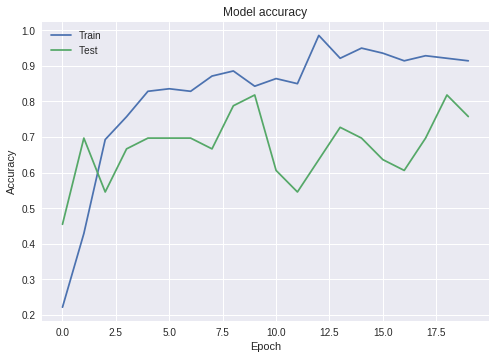

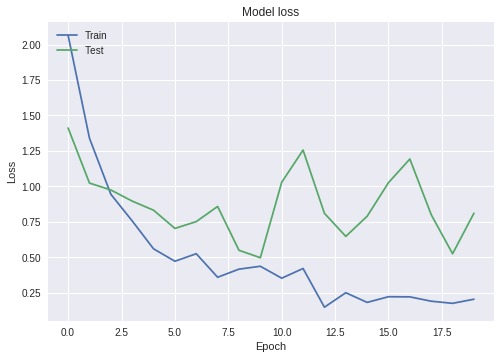

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Test des prédictions

In [0]:
import numpy as np
from keras.models import load_model
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from google.colab import files

file = list(files.upload().keys())[0]

image = load_img(file, target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

predictions = model.predict(image)
print(predictions)

Saving 5010477348357_A_4279994_S01.png to 5010477348357_A_4279994_S01.png
[[7.4087816e-01 9.4186740e-05 3.5548620e-02 1.5451469e-05 2.2323999e-01
  2.2360400e-04]]


## Améliorations

### Data augmentation

In [0]:
!rm -rf train-output
!mkdir train-output

from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                   horizontal_flip = True,
                                   fill_mode = "nearest",
                                   zoom_range = 0.15,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.15,
                                   brightness_range = [0.5, 1.5],
                                   rotation_range = 20)

train_generator = train_datagen.flow_from_directory('data/train/famille',
                                                    #save_to_dir = 'train-output',
                                                    target_size = (224, 224),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    shuffle=True)

validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

validation_generator = validation_datagen.flow_from_directory('data/test/famille',
                                                              target_size = (224, 224),
                                                              batch_size = 32,
                                                              class_mode = 'categorical',
                                                              shuffle=False)

Found 140 images belonging to 6 classes.
Found 33 images belonging to 6 classes.


### DropOut

In [0]:
from keras import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense, Dropout

base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

for layer in base.layers:
    layer.trainable = False

x = Dense(256, activation='relu')(base.output)
x = Dropout(0.5)(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs = base.input, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

### Learning rate
![Texte alternatif…](https://i.stack.imgur.com/iMASu.jpg)

In [0]:
from keras import Model
from keras.optimizers import Adam
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense, Dropout

base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

for layer in base.layers:
    layer.trainable = False

x = Dense(256, activation='relu')(base.output)
x = Dropout(0.5)(x)
x = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs = base.input, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001, decay=0.001 / 200), metrics=['accuracy'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

### Early stopping

In [0]:
import numpy as np
from keras.callbacks import EarlyStopping

history = model.fit_generator(generator = train_generator,
                              steps_per_epoch = np.ceil(train_generator.n/train_generator.batch_size),
                              epochs = 100,
                              callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
                              validation_data = validation_generator,
                              validation_steps = np.ceil(validation_generator.n/validation_generator.batch_size))

Epoch 1/100
5/5 [==============================] - 8s 2s/step - loss: 2.0371 - acc: 0.2418 - val_loss: 1.4116 - val_acc: 0.4545
Epoch 2/100
5/5 [==============================] - 1s 105ms/step - loss: 1.3184 - acc: 0.4447 - val_loss: 1.0228 - val_acc: 0.6970
Epoch 3/100
5/5 [==============================] - 1s 106ms/step - loss: 0.9531 - acc: 0.6901 - val_loss: 0.9740 - val_acc: 0.5455
Epoch 4/100
5/5 [==============================] - 2s 367ms/step - loss: 0.8269 - acc: 0.7304 - val_loss: 0.8954 - val_acc: 0.6667
Epoch 5/100
5/5 [==============================] - 3s 506ms/step - loss: 0.5634 - acc: 0.8291 - val_loss: 0.8312 - val_acc: 0.6970
Epoch 6/100
5/5 [==============================] - 3s 511ms/step - loss: 0.4705 - acc: 0.8355 - val_loss: 0.7027 - val_acc: 0.6970
Epoch 7/100
5/5 [==============================] - 2s 494ms/step - loss: 0.5761 - acc: 0.8117 - val_loss: 0.7508 - val_acc: 0.6970
Epoch 8/100
5/5 [==============================] - 2s 428ms/step - loss: 0.3568 - acc:

### Synthèse

Training famille
Found 140 images belonging to 6 classes.
Found 33 images belonging to 6 classes.
Epoch 1/200
5/5 [==============================] - 18s 4s/step - loss: 2.1694 - acc: 0.1453 - val_loss: 1.5876 - val_acc: 0.2727
Epoch 2/200
5/5 [==============================] - 2s 379ms/step - loss: 1.7630 - acc: 0.2971 - val_loss: 1.3044 - val_acc: 0.5455
Epoch 3/200
5/5 [==============================] - 2s 380ms/step - loss: 1.4129 - acc: 0.4744 - val_loss: 1.0675 - val_acc: 0.7273
Epoch 4/200
5/5 [==============================] - 2s 385ms/step - loss: 1.1720 - acc: 0.5320 - val_loss: 0.8753 - val_acc: 0.7576
Epoch 5/200
5/5 [==============================] - 2s 382ms/step - loss: 1.0197 - acc: 0.6965 - val_loss: 0.7110 - val_acc: 0.8182
Epoch 6/200
5/5 [==============================] - 3s 571ms/step - loss: 0.7396 - acc: 0.8122 - val_loss: 0.5923 - val_acc: 0.9091
Epoch 7/200
5/5 [==============================] - 3s 618ms/step - loss: 0.6550 - acc: 0.8332 - val_loss: 0.4960 - val

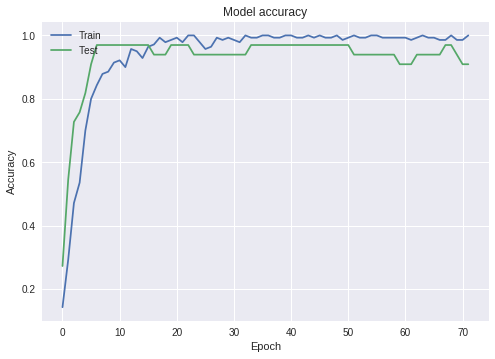

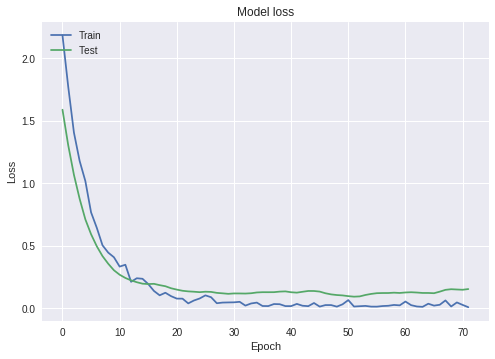

Saving...
Training marque
Found 125 images belonging to 16 classes.
Found 28 images belonging to 16 classes.
Epoch 1/200
4/4 [==============================] - 22s 6s/step - loss: 3.0512 - acc: 0.1203 - val_loss: 2.5666 - val_acc: 0.1429
Epoch 2/200
4/4 [==============================] - 2s 417ms/step - loss: 2.5396 - acc: 0.2139 - val_loss: 2.3349 - val_acc: 0.1786
Epoch 3/200
4/4 [==============================] - 2s 423ms/step - loss: 2.3972 - acc: 0.2662 - val_loss: 2.1073 - val_acc: 0.3214
Epoch 4/200
4/4 [==============================] - 2s 423ms/step - loss: 2.1773 - acc: 0.2969 - val_loss: 1.9151 - val_acc: 0.4286
Epoch 5/200
4/4 [==============================] - 2s 411ms/step - loss: 1.8743 - acc: 0.4487 - val_loss: 1.7319 - val_acc: 0.5714
Epoch 6/200
4/4 [==============================] - 2s 421ms/step - loss: 1.5877 - acc: 0.5454 - val_loss: 1.5788 - val_acc: 0.6429
Epoch 7/200
4/4 [==============================] - 3s 673ms/step - loss: 1.4966 - acc: 0.5821 - val_loss: 1

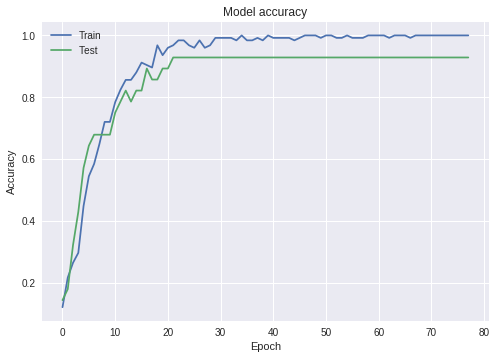

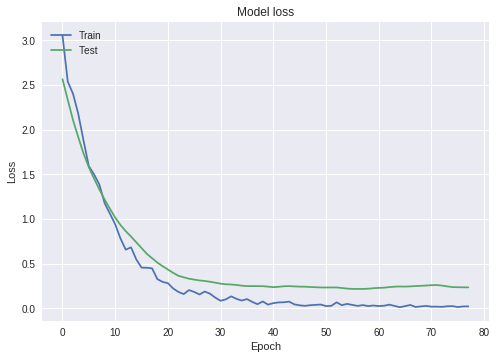

Saving...
Training label
Found 58 images belonging to 3 classes.
Found 14 images belonging to 3 classes.
Epoch 1/200
2/2 [==============================] - 24s 12s/step - loss: 1.3987 - acc: 0.2617 - val_loss: 0.9623 - val_acc: 0.5714
Epoch 2/200
2/2 [==============================] - 1s 392ms/step - loss: 1.1472 - acc: 0.3820 - val_loss: 0.8523 - val_acc: 0.6429
Epoch 3/200
2/2 [==============================] - 1s 396ms/step - loss: 1.0519 - acc: 0.5299 - val_loss: 0.8522 - val_acc: 0.6429
Epoch 4/200
2/2 [==============================] - 1s 389ms/step - loss: 0.9487 - acc: 0.6180 - val_loss: 0.8096 - val_acc: 0.6429
Epoch 5/200
2/2 [==============================] - 1s 398ms/step - loss: 0.8156 - acc: 0.7108 - val_loss: 0.7617 - val_acc: 0.6429
Epoch 6/200
2/2 [==============================] - 1s 397ms/step - loss: 0.7096 - acc: 0.6664 - val_loss: 0.7133 - val_acc: 0.6429
Epoch 7/200
2/2 [==============================] - 1s 399ms/step - loss: 0.6605 - acc: 0.7246 - val_loss: 0.64

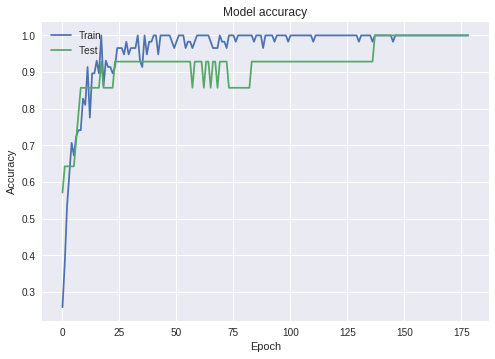

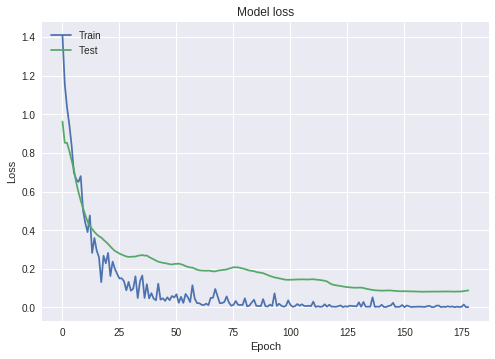

Saving...
Training bio
Found 54 images belonging to 2 classes.
Found 13 images belonging to 2 classes.
Epoch 1/200
2/2 [==============================] - 28s 14s/step - loss: 0.9945 - acc: 0.5047 - val_loss: 0.7680 - val_acc: 0.6923
Epoch 2/200
2/2 [==============================] - 1s 369ms/step - loss: 0.6680 - acc: 0.6351 - val_loss: 0.6698 - val_acc: 0.6923
Epoch 3/200
2/2 [==============================] - 1s 369ms/step - loss: 0.5351 - acc: 0.7773 - val_loss: 0.6164 - val_acc: 0.6923
Epoch 4/200
2/2 [==============================] - 1s 374ms/step - loss: 0.4453 - acc: 0.7701 - val_loss: 0.5597 - val_acc: 0.6154
Epoch 5/200
2/2 [==============================] - 1s 371ms/step - loss: 0.4385 - acc: 0.7938 - val_loss: 0.5358 - val_acc: 0.7692
Epoch 6/200
2/2 [==============================] - 1s 368ms/step - loss: 0.4484 - acc: 0.8152 - val_loss: 0.5236 - val_acc: 0.8462
Epoch 7/200
2/2 [==============================] - 1s 379ms/step - loss: 0.3752 - acc: 0.8697 - val_loss: 0.5128

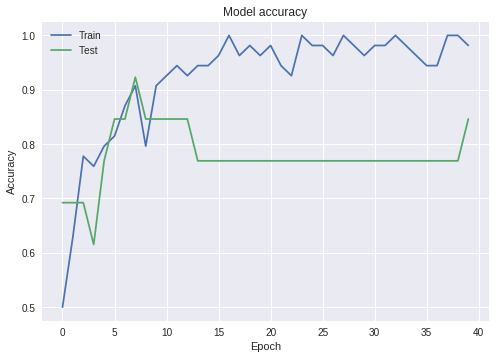

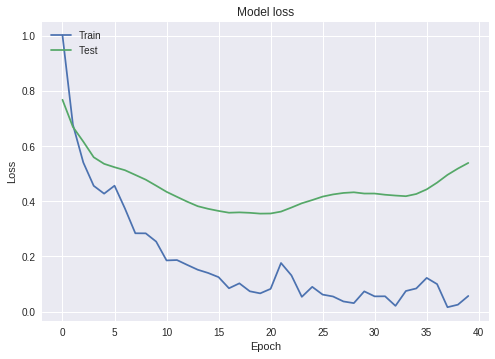

Saving...


In [0]:
from keras import Model
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import json

def train(dataset):
  print('Training ' + dataset)
  
  train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                     horizontal_flip = True,
                                     fill_mode = "nearest",
                                     zoom_range = 0.3,
                                     width_shift_range = 0.3,
                                     height_shift_range = 0.3,
                                     shear_range = 0.15,
                                     brightness_range = [0.5, 1.5],
                                     rotation_range = 30)

  train_generator = train_datagen.flow_from_directory('data/train/' + dataset,
                                                      target_size = (224, 224),
                                                      batch_size = 32,
                                                      class_mode = 'categorical',
                                                      shuffle=True)

  validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

  validation_generator = validation_datagen.flow_from_directory('data/test/' + dataset,
                                                                target_size = (224, 224),
                                                                batch_size = 32,
                                                                class_mode = 'categorical',
                                                                shuffle=False)
  
  base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')

#  for layer in base.layers:
#      layer.trainable = False

  x = Dense(256, activation='relu')(base.output)
  x = Dropout(0.5)(x)
  x = Dense(train_generator.num_classes, activation='softmax')(x)

  model = Model(inputs = base.input, outputs = x)
  model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=0.0001 / 200), metrics=['accuracy'])
  
  labels = (train_generator.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  with open('./' + dataset + '.json', 'w') as outfile:
    json.dump(labels, outfile)

  history = model.fit_generator(generator = train_generator,
                              steps_per_epoch = np.ceil(train_generator.n/train_generator.batch_size),
                              epochs = 200,
                              callbacks=[EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)],
                              validation_data = validation_generator,
                              validation_steps = np.ceil(validation_generator.n/validation_generator.batch_size),
                              verbose = 1)

  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  print('Saving...')
  model.save('./' + dataset + '.h5')
  return model

train('famille');
train('marque');
train('label');
train('bio');

## Modèle final


### Fusion des modèles

On fusionne ici les 4 réseaux précédents pour effectuer les prédictions en une seule passe.


In [0]:
from keras import Model, Input
from keras.engine.saving import load_model

inputs = Input(shape=(224, 224, 3))

print('Loading famille')
model_1 = load_model('famille.h5')
print('Loading marque')
model_2 = load_model('marque.h5')
print('Loading label')
model_3 = load_model('label.h5')
print('Loading bio')
model_4 = load_model('bio.h5')

model = Model(inputs = inputs, outputs = [model_1(inputs), model_2(inputs), model_3(inputs), model_4(inputs)])
model.summary()
model.compile(optimizer='adam', loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], metrics=["accuracy"])
model.save('merged.h5')


### Prédiction avec Keras

In [0]:
import numpy as np
from keras.models import load_model
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from google.colab import files

file = list(files.upload().keys())[0]

image = load_img(file, target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

model = load_model('data/result/models/merged.h5')
predictions = model.predict(image)
print(predictions)

### Export du modèle pour TensorFlow.js

L'export du modèle pour TensorFlow.js permet son utilisation dans des appications Web ou Node.js.

In [0]:
!pip install --no-dependencies tensorflowjs

In [0]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, '/usr/local/share/jupyter/nbextensions/model')

Les modèles Keras peuvent également être convertis en ligne de commande.

In [0]:
!tensorflowjs_converter --input_format keras ./models/mobilenet.h5 /usr/local/share/jupyter/nbextensions/model

### Export du modèle pour TensorFlow Lite

L'export du modèle au format TensorFlow Lite permet son utilisation dans des appications mobiles (Android et iOS) via [ML Kit](https://developers.google.com/ml-kit/).



In [0]:
from tensorflow.contrib.lite.python import lite
converter = lite.TFLiteConverter.from_keras_model_file('data/result/models/marque.h5')
open("data/result/models/marque.tflite" , "wb").write(converter.convert())

INFO:tensorflow:Froze 264 variables.
INFO:tensorflow:Converted 264 variables to const ops.


10178308

## Client

### MobileNetV1

In [0]:
%%html
<script src="https://cdn.jsdelivr.net/npm/@tensorflow/tfjs@0.14.2/dist/tf.min.js"></script>
<script type="text/javascript">
  var CLASSES = ['tench, Tinca tinca','goldfish, Carassius auratus','great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias','tiger shark, Galeocerdo cuvieri','hammerhead, hammerhead shark','electric ray, crampfish, numbfish, torpedo','stingray','cock','hen','ostrich, Struthio camelus','brambling, Fringilla montifringilla','goldfinch, Carduelis carduelis','house finch, linnet, Carpodacus mexicanus','junco, snowbird','indigo bunting, indigo finch, indigo bird, Passerina cyanea','robin, American robin, Turdus migratorius','bulbul','jay','magpie','chickadee','water ouzel, dipper','kite','bald eagle, American eagle, Haliaeetus leucocephalus','vulture','great grey owl, great gray owl, Strix nebulosa','European fire salamander, Salamandra salamandra','common newt, Triturus vulgaris','eft','spotted salamander, Ambystoma maculatum','axolotl, mud puppy, Ambystoma mexicanum','bullfrog, Rana catesbeiana','tree frog, tree-frog','tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui','loggerhead, loggerhead turtle, Caretta caretta','leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea','mud turtle','terrapin','box turtle, box tortoise','banded gecko','common iguana, iguana, Iguana iguana','American chameleon, anole, Anolis carolinensis','whiptail, whiptail lizard','agama','frilled lizard, Chlamydosaurus kingi','alligator lizard','Gila monster, Heloderma suspectum','green lizard, Lacerta viridis','African chameleon, Chamaeleo chamaeleon','Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis','African crocodile, Nile crocodile, Crocodylus niloticus','American alligator, Alligator mississipiensis','triceratops','thunder snake, worm snake, Carphophis amoenus','ringneck snake, ring-necked snake, ring snake','hognose snake, puff adder, sand viper','green snake, grass snake','king snake, kingsnake','garter snake, grass snake','water snake','vine snake','night snake, Hypsiglena torquata','boa constrictor, Constrictor constrictor','rock python, rock snake, Python sebae','Indian cobra, Naja naja','green mamba','sea snake','horned viper, cerastes, sand viper, horned asp, Cerastes cornutus','diamondback, diamondback rattlesnake, Crotalus adamanteus','sidewinder, horned rattlesnake, Crotalus cerastes','trilobite','harvestman, daddy longlegs, Phalangium opilio','scorpion','black and gold garden spider, Argiope aurantia','barn spider, Araneus cavaticus','garden spider, Aranea diademata','black widow, Latrodectus mactans','tarantula','wolf spider, hunting spider','tick','centipede','black grouse','ptarmigan','ruffed grouse, partridge, Bonasa umbellus','prairie chicken, prairie grouse, prairie fowl','peacock','quail','partridge','African grey, African gray, Psittacus erithacus','macaw','sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita','lorikeet','coucal','bee eater','hornbill','hummingbird','jacamar','toucan','drake','red-breasted merganser, Mergus serrator','goose','black swan, Cygnus atratus','tusker','echidna, spiny anteater, anteater','platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus','wallaby, brush kangaroo','koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus','wombat','jellyfish','sea anemone, anemone','brain coral','flatworm, platyhelminth','nematode, nematode worm, roundworm','conch','snail','slug','sea slug, nudibranch','chiton, coat-of-mail shell, sea cradle, polyplacophore','chambered nautilus, pearly nautilus, nautilus','Dungeness crab, Cancer magister','rock crab, Cancer irroratus','fiddler crab','king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodes camtschatica','American lobster, Northern lobster, Maine lobster, Homarus americanus','spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish','crayfish, crawfish, crawdad, crawdaddy','hermit crab','isopod','white stork, Ciconia ciconia','black stork, Ciconia nigra','spoonbill','flamingo','little blue heron, Egretta caerulea','American egret, great white heron, Egretta albus','bittern','crane','limpkin, Aramus pictus','European gallinule, Porphyrio porphyrio','American coot, marsh hen, mud hen, water hen, Fulica americana','bustard','ruddy turnstone, Arenaria interpres','red-backed sandpiper, dunlin, Erolia alpina','redshank, Tringa totanus','dowitcher','oystercatcher, oyster catcher','pelican','king penguin, Aptenodytes patagonica','albatross, mollymawk','grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus','killer whale, killer, orca, grampus, sea wolf, Orcinus orca','dugong, Dugong dugon','sea lion','Chihuahua','Japanese spaniel','Maltese dog, Maltese terrier, Maltese','Pekinese, Pekingese, Peke','Shih-Tzu','Blenheim spaniel','papillon','toy terrier','Rhodesian ridgeback','Afghan hound, Afghan','basset, basset hound','beagle','bloodhound, sleuthhound','bluetick','black-and-tan coonhound','Walker hound, Walker foxhound','English foxhound','redbone','borzoi, Russian wolfhound','Irish wolfhound','Italian greyhound','whippet','Ibizan hound, Ibizan Podenco','Norwegian elkhound, elkhound','otterhound, otter hound','Saluki, gazelle hound','Scottish deerhound, deerhound','Weimaraner','Staffordshire bullterrier, Staffordshire bull terrier','American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier','Bedlington terrier','Border terrier','Kerry blue terrier','Irish terrier','Norfolk terrier','Norwich terrier','Yorkshire terrier','wire-haired fox terrier','Lakeland terrier','Sealyham terrier, Sealyham','Airedale, Airedale terrier','cairn, cairn terrier','Australian terrier','Dandie Dinmont, Dandie Dinmont terrier','Boston bull, Boston terrier','miniature schnauzer','giant schnauzer','standard schnauzer','Scotch terrier, Scottish terrier, Scottie','Tibetan terrier, chrysanthemum dog','silky terrier, Sydney silky','soft-coated wheaten terrier','West Highland white terrier','Lhasa, Lhasa apso','flat-coated retriever','curly-coated retriever','golden retriever','Labrador retriever','Chesapeake Bay retriever','German short-haired pointer','vizsla, Hungarian pointer','English setter','Irish setter, red setter','Gordon setter','Brittany spaniel','clumber, clumber spaniel','English springer, English springer spaniel','Welsh springer spaniel','cocker spaniel, English cocker spaniel, cocker','Sussex spaniel','Irish water spaniel','kuvasz','schipperke','groenendael','malinois','briard','kelpie','komondor','Old English sheepdog, bobtail','Shetland sheepdog, Shetland sheep dog, Shetland','collie','Border collie','Bouvier des Flandres, Bouviers des Flandres','Rottweiler','German shepherd, German shepherd dog, German police dog, alsatian','Doberman, Doberman pinscher','miniature pinscher','Greater Swiss Mountain dog','Bernese mountain dog','Appenzeller','EntleBucher','boxer','bull mastiff','Tibetan mastiff','French bulldog','Great Dane','Saint Bernard, St Bernard','Eskimo dog, husky','malamute, malemute, Alaskan malamute','Siberian husky','dalmatian, coach dog, carriage dog','affenpinscher, monkey pinscher, monkey dog','basenji','pug, pug-dog','Leonberg','Newfoundland, Newfoundland dog','Great Pyrenees','Samoyed, Samoyede','Pomeranian','chow, chow chow','keeshond','Brabancon griffon','Pembroke, Pembroke Welsh corgi','Cardigan, Cardigan Welsh corgi','toy poodle','miniature poodle','standard poodle','Mexican hairless','timber wolf, grey wolf, gray wolf, Canis lupus','white wolf, Arctic wolf, Canis lupus tundrarum','red wolf, maned wolf, Canis rufus, Canis niger','coyote, prairie wolf, brush wolf, Canis latrans','dingo, warrigal, warragal, Canis dingo','dhole, Cuon alpinus','African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus','hyena, hyaena','red fox, Vulpes vulpes','kit fox, Vulpes macrotis','Arctic fox, white fox, Alopex lagopus','grey fox, gray fox, Urocyon cinereoargenteus','tabby, tabby cat','tiger cat','Persian cat','Siamese cat, Siamese','Egyptian cat','cougar, puma, catamount, mountain lion, painter, panther, Felis concolor','lynx, catamount','leopard, Panthera pardus','snow leopard, ounce, Panthera uncia','jaguar, panther, Panthera onca, Felis onca','lion, king of beasts, Panthera leo','tiger, Panthera tigris','cheetah, chetah, Acinonyx jubatus','brown bear, bruin, Ursus arctos','American black bear, black bear, Ursus americanus, Euarctos americanus','ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus','sloth bear, Melursus ursinus, Ursus ursinus','mongoose','meerkat, mierkat','tiger beetle','ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle','ground beetle, carabid beetle','long-horned beetle, longicorn, longicorn beetle','leaf beetle, chrysomelid','dung beetle','rhinoceros beetle','weevil','fly','bee','ant, emmet, pismire','grasshopper, hopper','cricket','walking stick, walkingstick, stick insect','cockroach, roach','mantis, mantid','cicada, cicala','leafhopper','lacewing, lacewing fly','dragonfly, darning needle, devil\'s darning needle, sewing needle, snake feeder, snake doctor, mosquito hawk, skeeter hawk','damselfly','admiral','ringlet, ringlet butterfly','monarch, monarch butterfly, milkweed butterfly, Danaus plexippus','cabbage butterfly','sulphur butterfly, sulfur butterfly','lycaenid, lycaenid butterfly','starfish, sea star','sea urchin','sea cucumber, holothurian','wood rabbit, cottontail, cottontail rabbit','hare','Angora, Angora rabbit','hamster','porcupine, hedgehog','fox squirrel, eastern fox squirrel, Sciurus niger','marmot','beaver','guinea pig, Cavia cobaya','sorrel','zebra','hog, pig, grunter, squealer, Sus scrofa','wild boar, boar, Sus scrofa','warthog','hippopotamus, hippo, river horse, Hippopotamus amphibius','ox','water buffalo, water ox, Asiatic buffalo, Bubalus bubalis','bison','ram, tup','bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis','ibex, Capra ibex','hartebeest','impala, Aepyceros melampus','gazelle','Arabian camel, dromedary, Camelus dromedarius','llama','weasel','mink','polecat, fitch, foulmart, foumart, Mustela putorius','black-footed ferret, ferret, Mustela nigripes','otter','skunk, polecat, wood pussy','badger','armadillo','three-toed sloth, ai, Bradypus tridactylus','orangutan, orang, orangutang, Pongo pygmaeus','gorilla, Gorilla gorilla','chimpanzee, chimp, Pan troglodytes','gibbon, Hylobates lar','siamang, Hylobates syndactylus, Symphalangus syndactylus','guenon, guenon monkey','patas, hussar monkey, Erythrocebus patas','baboon','macaque','langur','colobus, colobus monkey','proboscis monkey, Nasalis larvatus','marmoset','capuchin, ringtail, Cebus capucinus','howler monkey, howler','titi, titi monkey','spider monkey, Ateles geoffroyi','squirrel monkey, Saimiri sciureus','Madagascar cat, ring-tailed lemur, Lemur catta','indri, indris, Indri indri, Indri brevicaudatus','Indian elephant, Elephas maximus','African elephant, Loxodonta africana','lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens','giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca','barracouta, snoek','eel','coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch','rock beauty, Holocanthus tricolor','anemone fish','sturgeon','gar, garfish, garpike, billfish, Lepisosteus osseus','lionfish','puffer, pufferfish, blowfish, globefish','abacus','abaya','academic gown, academic robe, judge\'s robe','accordion, piano accordion, squeeze box','acoustic guitar','aircraft carrier, carrier, flattop, attack aircraft carrier','airliner','airship, dirigible','altar','ambulance','amphibian, amphibious vehicle','analog clock','apiary, bee house','apron','ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin','assault rifle, assault gun','backpack, back pack, knapsack, packsack, rucksack, haversack','bakery, bakeshop, bakehouse','balance beam, beam','balloon','ballpoint, ballpoint pen, ballpen, Biro','Band Aid','banjo','bannister, banister, balustrade, balusters, handrail','barbell','barber chair','barbershop','barn','barometer','barrel, cask','barrow, garden cart, lawn cart, wheelbarrow','baseball','basketball','bassinet','bassoon','bathing cap, swimming cap','bath towel','bathtub, bathing tub, bath, tub','beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon','beacon, lighthouse, beacon light, pharos','beaker','bearskin, busby, shako','beer bottle','beer glass','bell cote, bell cot','bib','bicycle-built-for-two, tandem bicycle, tandem','bikini, two-piece','binder, ring-binder','binoculars, field glasses, opera glasses','birdhouse','boathouse','bobsled, bobsleigh, bob','bolo tie, bolo, bola tie, bola','bonnet, poke bonnet','bookcase','bookshop, bookstore, bookstall','bottlecap','bow','bow tie, bow-tie, bowtie','brass, memorial tablet, plaque','brassiere, bra, bandeau','breakwater, groin, groyne, mole, bulwark, seawall, jetty','breastplate, aegis, egis','broom','bucket, pail','buckle','bulletproof vest','bullet train, bullet','butcher shop, meat market','cab, hack, taxi, taxicab','caldron, cauldron','candle, taper, wax light','cannon','canoe','can opener, tin opener','cardigan','car mirror','carousel, carrousel, merry-go-round, roundabout, whirligig','carpenter\'s kit, tool kit','carton','car wheel','cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM','cassette','cassette player','castle','catamaran','CD player','cello, violoncello','cellular telephone, cellular phone, cellphone, cell, mobile phone','chain','chainlink fence','chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour','chain saw, chainsaw','chest','chiffonier, commode','chime, bell, gong','china cabinet, china closet','Christmas stocking','church, church building','cinema, movie theater, movie theatre, movie house, picture palace','cleaver, meat cleaver, chopper','cliff dwelling','cloak','clog, geta, patten, sabot','cocktail shaker','coffee mug','coffeepot','coil, spiral, volute, whorl, helix','combination lock','computer keyboard, keypad','confectionery, confectionary, candy store','container ship, containership, container vessel','convertible','corkscrew, bottle screw','cornet, horn, trumpet, trump','cowboy boot','cowboy hat, ten-gallon hat','cradle','crane','crash helmet','crate','crib, cot','Crock Pot','croquet ball','crutch','cuirass','dam, dike, dyke','desk','desktop computer','dial telephone, dial phone','diaper, nappy, napkin','digital clock','digital watch','dining table, board','dishrag, dishcloth','dishwasher, dish washer, dishwashing machine','disk brake, disc brake','dock, dockage, docking facility','dogsled, dog sled, dog sleigh','dome','doormat, welcome mat','drilling platform, offshore rig','drum, membranophone, tympan','drumstick','dumbbell','Dutch oven','electric fan, blower','electric guitar','electric locomotive','entertainment center','envelope','espresso maker','face powder','feather boa, boa','file, file cabinet, filing cabinet','fireboat','fire engine, fire truck','fire screen, fireguard','flagpole, flagstaff','flute, transverse flute','folding chair','football helmet','forklift','fountain','fountain pen','four-poster','freight car','French horn, horn','frying pan, frypan, skillet','fur coat','garbage truck, dustcart','gasmask, respirator, gas helmet','gas pump, gasoline pump, petrol pump, island dispenser','goblet','go-kart','golf ball','golfcart, golf cart','gondola','gong, tam-tam','gown','grand piano, grand','greenhouse, nursery, glasshouse','grille, radiator grille','grocery store, grocery, food market, market','guillotine','hair slide','hair spray','half track','hammer','hamper','hand blower, blow dryer, blow drier, hair dryer, hair drier','hand-held computer, hand-held microcomputer','handkerchief, hankie, hanky, hankey','hard disc, hard disk, fixed disk','harmonica, mouth organ, harp, mouth harp','harp','harvester, reaper','hatchet','holster','home theater, home theatre','honeycomb','hook, claw','hoopskirt, crinoline','horizontal bar, high bar','horse cart, horse-cart','hourglass','iPod','iron, smoothing iron','jack-o\'-lantern','jean, blue jean, denim','jeep, landrover','jersey, T-shirt, tee shirt','jigsaw puzzle','jinrikisha, ricksha, rickshaw','joystick','kimono','knee pad','knot','lab coat, laboratory coat','ladle','lampshade, lamp shade','laptop, laptop computer','lawn mower, mower','lens cap, lens cover','letter opener, paper knife, paperknife','library','lifeboat','lighter, light, igniter, ignitor','limousine, limo','liner, ocean liner','lipstick, lip rouge','Loafer','lotion','loudspeaker, speaker, speaker unit, loudspeaker system, speaker system','loupe, jeweler\'s loupe','lumbermill, sawmill','magnetic compass','mailbag, postbag','mailbox, letter box','maillot','maillot, tank suit','manhole cover','maraca','marimba, xylophone','mask','matchstick','maypole','maze, labyrinth','measuring cup','medicine chest, medicine cabinet','megalith, megalithic structure','microphone, mike','microwave, microwave oven','military uniform','milk can','minibus','miniskirt, mini','minivan','missile','mitten','mixing bowl','mobile home, manufactured home','Model T','modem','monastery','monitor','moped','mortar','mortarboard','mosque','mosquito net','motor scooter, scooter','mountain bike, all-terrain bike, off-roader','mountain tent','mouse, computer mouse','mousetrap','moving van','muzzle','nail','neck brace','necklace','nipple','notebook, notebook computer','obelisk','oboe, hautboy, hautbois','ocarina, sweet potato','odometer, hodometer, mileometer, milometer','oil filter','organ, pipe organ','oscilloscope, scope, cathode-ray oscilloscope, CRO','overskirt','oxcart','oxygen mask','packet','paddle, boat paddle','paddlewheel, paddle wheel','padlock','paintbrush','pajama, pyjama, pj\'s, jammies','palace','panpipe, pandean pipe, syrinx','paper towel','parachute, chute','parallel bars, bars','park bench','parking meter','passenger car, coach, carriage','patio, terrace','pay-phone, pay-station','pedestal, plinth, footstall','pencil box, pencil case','pencil sharpener','perfume, essence','Petri dish','photocopier','pick, plectrum, plectron','pickelhaube','picket fence, paling','pickup, pickup truck','pier','piggy bank, penny bank','pill bottle','pillow','ping-pong ball','pinwheel','pirate, pirate ship','pitcher, ewer','plane, carpenter\'s plane, woodworking plane','planetarium','plastic bag','plate rack','plow, plough','plunger, plumber\'s helper','Polaroid camera, Polaroid Land camera','pole','police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria','poncho','pool table, billiard table, snooker table','pop bottle, soda bottle','pot, flowerpot','potter\'s wheel','power drill','prayer rug, prayer mat','printer','prison, prison house','projectile, missile','projector','puck, hockey puck','punching bag, punch bag, punching ball, punchball','purse','quill, quill pen','quilt, comforter, comfort, puff','racer, race car, racing car','racket, racquet','radiator','radio, wireless','radio telescope, radio reflector','rain barrel','recreational vehicle, RV, R.V.','reel','reflex camera','refrigerator, icebox','remote control, remote','restaurant, eating house, eating place, eatery','revolver, six-gun, six-shooter','rifle','rocking chair, rocker','rotisserie','rubber eraser, rubber, pencil eraser','rugby ball','rule, ruler','running shoe','safe','safety pin','saltshaker, salt shaker','sandal','sarong','sax, saxophone','scabbard','scale, weighing machine','school bus','schooner','scoreboard','screen, CRT screen','screw','screwdriver','seat belt, seatbelt','sewing machine','shield, buckler','shoe shop, shoe-shop, shoe store','shoji','shopping basket','shopping cart','shovel','shower cap','shower curtain','ski','ski mask','sleeping bag','slide rule, slipstick','sliding door','slot, one-armed bandit','snorkel','snowmobile','snowplow, snowplough','soap dispenser','soccer ball','sock','solar dish, solar collector, solar furnace','sombrero','soup bowl','space bar','space heater','space shuttle','spatula','speedboat','spider web, spider\'s web','spindle','sports car, sport car','spotlight, spot','stage','steam locomotive','steel arch bridge','steel drum','stethoscope','stole','stone wall','stopwatch, stop watch','stove','strainer','streetcar, tram, tramcar, trolley, trolley car','stretcher','studio couch, day bed','stupa, tope','submarine, pigboat, sub, U-boat','suit, suit of clothes','sundial','sunglass','sunglasses, dark glasses, shades','sunscreen, sunblock, sun blocker','suspension bridge','swab, swob, mop','sweatshirt','swimming trunks, bathing trunks','swing','switch, electric switch, electrical switch','syringe','table lamp','tank, army tank, armored combat vehicle, armoured combat vehicle','tape player','teapot','teddy, teddy bear','television, television system','tennis ball','thatch, thatched roof','theater curtain, theatre curtain','thimble','thresher, thrasher, threshing machine','throne','tile roof','toaster','tobacco shop, tobacconist shop, tobacconist','toilet seat','torch','totem pole','tow truck, tow car, wrecker','toyshop','tractor','trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi','tray','trench coat','tricycle, trike, velocipede','trimaran','tripod','triumphal arch','trolleybus, trolley coach, trackless trolley','trombone','tub, vat','turnstile','typewriter keyboard','umbrella','unicycle, monocycle','upright, upright piano','vacuum, vacuum cleaner','vase','vault','velvet','vending machine','vestment','viaduct','violin, fiddle','volleyball','waffle iron','wall clock','wallet, billfold, notecase, pocketbook','wardrobe, closet, press','warplane, military plane','washbasin, handbasin, washbowl, lavabo, wash-hand basin','washer, automatic washer, washing machine','water bottle','water jug','water tower','whiskey jug','whistle','wig','window screen','window shade','Windsor tie','wine bottle','wing','wok','wooden spoon','wool, woolen, woollen','worm fence, snake fence, snake-rail fence, Virginia fence','wreck','yawl','yurt','web site, website, internet site, site','comic book','crossword puzzle, crossword','street sign','traffic light, traffic signal, stoplight','book jacket, dust cover, dust jacket, dust wrapper','menu','plate','guacamole','consomme','hot pot, hotpot','trifle','ice cream, icecream','ice lolly, lolly, lollipop, popsicle','French loaf','bagel, beigel','pretzel','cheeseburger','hotdog, hot dog, red hot','mashed potato','head cabbage','broccoli','cauliflower','zucchini, courgette','spaghetti squash','acorn squash','butternut squash','cucumber, cuke','artichoke, globe artichoke','bell pepper','cardoon','mushroom','Granny Smith','strawberry','orange','lemon','fig','pineapple, ananas','banana','jackfruit, jak, jack','custard apple','pomegranate','hay','carbonara','chocolate sauce, chocolate syrup','dough','meat loaf, meatloaf','pizza, pizza pie','potpie','burrito','red wine','espresso','cup','eggnog','alp','bubble','cliff, drop, drop-off','coral reef','geyser','lakeside, lakeshore','promontory, headland, head, foreland','sandbar, sand bar','seashore, coast, seacoast, sea-coast','valley, vale','volcano','ballplayer, baseball player','groom, bridegroom','scuba diver','rapeseed','daisy','yellow lady\'s slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum','corn','acorn','hip, rose hip, rosehip','buckeye, horse chestnut, conker','coral fungus','agaric','gyromitra','stinkhorn, carrion fungus','earthstar','hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa','bolete','ear, spike, capitulum','toilet tissue, toilet paper, bathroom tissue'];
  var video = document.getElementById('video');
  var prediction = document.getElementById('prediction');
  
  var model = null;

  // Chargement du modèle sauvegardé
  function loadModel() {
    tf.loadModel('https://storage.googleapis.com/tfjs-models/tfjs/mobilenet_v1_0.25_224/model.json').then(function(loaded) {
      model = loaded;
      requestAnimationFrame(predict);
    });
  }
  
  // Initialisation de la webcam
  function init() {
    if (navigator.mediaDevices && navigator.mediaDevices.getUserMedia) {
      navigator.mediaDevices.getUserMedia({ video: true }).then(function(stream) {
        video.srcObject = stream;
        video.play();
        loadModel();
      });
    }
  }
  
  function predict() {
    if (model) {
      
      // La fonction tidy permet de libérer les ressources GPU allouées
      tf.tidy(function() {
        
        // Préparation de l'image
        var input = tf.fromPixels(video)
                      .resizeNearestNeighbor([224, 224])
                      .toFloat().sub(tf.scalar(127.5))
                      .div(tf.scalar(127.5))
                      .expandDims();
        
        // Prédiction
        model.predict(input).data().then(function(values) {
          var max = 0;
          var clazz = -1;
          for (var i = 0; i < values.length; i++) {
            if (values[i] > max) {
              max = values[i];
              clazz= i;
            }
          }
          if (clazz >= 0) {
            prediction.innerHTML = CLASSES[clazz] + ' (' + (max * 100).toFixed(2) + '%)';
          }
          requestAnimationFrame(predict);
        });
      })
    }
  }
  init();
</script>
<video id="video" width="320" height="240" autoplay></video>
<div id="prediction">loading...</div>


### Modèle "maison"

Si besoin, on copie le modèle précompilé pour tensorflowjs dans le répertoire de destination.

In [0]:
!mkdir -p /usr/local/share/jupyter/nbextensions/model
!cp -R data/result/tfjs/* /usr/local/share/jupyter/nbextensions/model

Version du client qui utilise le modèle fusionné.

In [0]:
%%html
<script src="https://cdn.jsdelivr.net/npm/@tensorflow/tfjs@0.14.2/dist/tf.min.js"></script>
<script type="text/javascript">
  var FAMILLE = ["cereale", "eau", "jambon", "oeuf", "pate", "soda"];
  var MARQUE = ["barilla", "breizh-cola", "chocapic", "coca-cola", "coco-pops", "cristaline", "fanta", "fleury-michon", "lion", "loue", "miel-pops", "nesquik", "orangina", "pepsi", "tresor", "u"];
  var LABEL = ["aucun", "bleu-blanc-coeur", "label-rouge"];
  var Bio = ["pas bio", "bio"];
  var video = document.getElementById('video');
  var prediction = document.getElementById('prediction');
  
  var model = null;

  // Chargement du modèle sauvegardé
  function loadModel() {
    tf.loadModel('/nbextensions/model/model.json').then(function(loaded) {
      model = loaded;
      requestAnimationFrame(predict);
    });
  }
  
  // Initialisation de la webcam
  function init() {
    if (navigator.mediaDevices && navigator.mediaDevices.getUserMedia) {
      navigator.mediaDevices.getUserMedia({ video: true }).then(function(stream) {
        video.srcObject = stream;
        video.play();
        loadModel();
      });
    }
  }
  
  function predict() {
    if (model) {
      
      // La fonction tidy permet de libérer les ressources GPU allouées
      tf.tidy(function() {
        
        // Préparation de l'image
        var input = tf.fromPixels(video)
                      .resizeNearestNeighbor([224, 224])
                      .toFloat().sub(tf.scalar(127.5))
                      .div(tf.scalar(127.5))
                      .expandDims();
        
        // Prédiction
        model.predict(input).data().then(function(values) {
          var max = 0;
          var clazz = -1;
          for (var i = 0; i < values.length; i++) {
            if (values[i] > max) {
              max = values[i];
              clazz= i;
            }
          }
          if (clazz >= 0) {
            prediction.innerHTML = clazz + ' : ' + CLASSES[clazz] + ' (' + (max * 100).toFixed(2) + '%)';
          }
          requestAnimationFrame(predict);
        });
      })
    }
  }
  init();
</script>
<video id="video" width="320" height="240" autoplay></video>
<div id="prediction">loading...</div>


Version qui appelle plusieurs CNN

In [0]:
%%html
<script src="https://cdn.jsdelivr.net/npm/@tensorflow/tfjs@0.14.2/dist/tf.min.js"></script>
<script type="text/javascript">
  var CLASSES = [
      ["cereale", "eau", "jambon", "oeuf", "pate", "soda"],
      ["barilla", "breizh-cola", "chocapic", "coca-cola", "coco-pops", "cristaline", "fanta", "fleury-michon", "lion", "loue", "miel-pops", "nesquik", "orangina", "pepsi", "tresor", "u"],
      ["aucun", "bleu-blanc-coeur", "label-rouge"],
      ["pas bio", "bio"]
  ];
  var video = document.getElementById('video');

  var elm = [
      document.getElementById('famille'),
      document.getElementById('marque'),
      document.getElementById('label'),
      document.getElementById('bio')
  ];

  var model = [];

  // Chargement du modèle sauvegardé
  function loadModel() {
      tf.loadModel('/nbextensions/model/famille/model.json').then(function(loaded) {
          model.push(loaded);
          tf.loadModel('/nbextensions/model/marque/model.json').then(function(loaded) {
              model.push(loaded);
              tf.loadModel('/nbextensions/model/label/model.json').then(function(loaded) {
                  model.push(loaded);
                  tf.loadModel('/nbextensions/model/bio/model.json').then(function(loaded) {
                      model.push(loaded);
                      requestAnimationFrame(predict);
                  });
              });
          });
      });
  }

  // Initialisation de la webcam
  function init() {
      if (navigator.mediaDevices && navigator.mediaDevices.getUserMedia) {
          navigator.mediaDevices.getUserMedia({ video: true }).then(function(stream) {
              video.srcObject = stream;
              video.play();
              loadModel();
          });
      }
  }

  function display(values, e, i) {
      var max = 0;
      var clazz = -1;
      for (var j = 0; j < values.length; j++) {
          if (values[j] > max) {
              max = values[j];
              clazz= j;
          }
      }
      if (clazz >= 0) {
          e.innerHTML = CLASSES[i][clazz] + ' (' + (max * 100).toFixed(2) + '%)' + '<br>';
      }
  }

  function predict() {
      // La fonction tidy permet de libérer les ressources GPU allouées
      tf.tidy(function() {

          // Préparation de l'image
          var input = tf.fromPixels(video)
              .resizeNearestNeighbor([224, 224])
              .toFloat().sub(tf.scalar(127.5))
              .div(tf.scalar(127.5))
              .expandDims();

          var i = 0;

          // Prédiction
          for (var j = 0; j < model.length; j++) {
              const k = j;
              model[j].predict(input).data().then(function(value) {
                  display(value, elm[k], k);
                  i++;
                  if (i === model.length) requestAnimationFrame(predict);
              });
          }
      })
  }
  init();
</script>
<video id="video" width="320" height="240" autoplay></video>
<div id="famille">loading...</div>
<div id="marque"></div>
<div id="label"></div>
<div id="bio"></div>


## Pistes d'amélioration

*  Ajouter la détection des objets : utilisation de SSDLite
*  Ajouter la détection des textes : voir OCR ci-dessous
*  Ajouter la heatmap d'activation des classes

### Heatmap 

Grad-CAM (Gradient Class Activation Maps) est une technique de visualisation des réseaux de neurones convolutifs permettant d'afficher les zones de l'image qui ont influencé les prédictions.

![](https://i.stack.imgur.com/5GNMh.jpg)

Exemple d'implémentation : https://github.com/jacobgil/keras-grad-cam


Model prediction:
[[9.9956697e-01 1.9971243e-04 4.6202731e-05 1.7086049e-05 1.6105834e-04
  8.9477071e-06]]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

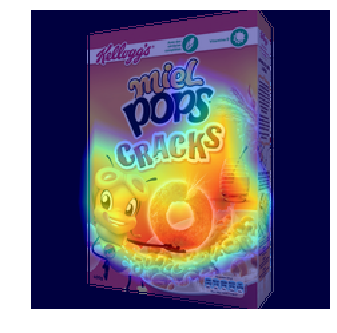

In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.mobilenetv2 import preprocess_input

import tensorflow as tf
from tensorflow.python.framework import ops

def build_model():
    return load_model('data/result/models/famille.h5')

def load_image(path, preprocess=True):
    x = image.load_img(path, target_size=(224, 224))
    if preprocess:
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
    return x

def build_guided_model():
    if "GuidedBackProp" not in ops._gradient_registry._registry:
        @ops.RegisterGradient("GuidedBackProp")
        def _GuidedBackProp(op, grad):
            dtype = op.inputs[0].dtype
            return grad * tf.cast(grad > 0., dtype) * \
                   tf.cast(op.inputs[0] > 0., dtype)

    g = tf.get_default_graph()
    with g.gradient_override_map({'Relu': 'GuidedBackProp'}):
        new_model = build_model()
    return new_model


def grad_cam(input_model, image, cls, layer_name):
    y_c = input_model.output[0, cls]
    conv_output = input_model.get_layer(layer_name).output
    grads = K.gradients(y_c, conv_output)[0]
    gradient_function = K.function([input_model.input], [conv_output, grads])

    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    weights = np.mean(grads_val, axis=(0, 1))
    cam = np.dot(output, weights)

    cam = cv2.resize(cam, (224, 224), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    return cam

def compute_saliency(model, guided_model, img_path, layer_name='block5_conv3'):
    preprocessed_input = load_image(img_path)

    predictions = model.predict(preprocessed_input)

    print('Model prediction:')
    print(predictions)

    cls = np.argmax(predictions)
    
    gradcam = grad_cam(model, preprocessed_input, cls, layer_name)
    
    plt.axis('off')
    plt.imshow(load_image(img_path, preprocess=False))
    plt.imshow(gradcam, cmap='jet', alpha=0.5)

    return gradcam

model = build_model()
guided_model = build_guided_model()
compute_saliency(model, guided_model, layer_name='Conv_1_bn', img_path='data/train/marque/miel-pops/5053827101714_A_1960946_S01.png')


### OCR

Exemple de réseau capable d'extraire du texte depuis une image.

En plus de la classification via les images de produit, les textes extraits de ces images, même incomplets, permettent d'effectuer une recherche plus précise.

In [0]:
!pip install cairocffi

    100% |████████████████████████████████| 92kB 3.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/3a/2e/92/89e9dcce600a1a78bebe571fdd096669cba354b29c5e1140b9
Successfully built cairocffi


In [0]:
import os
import itertools
import codecs
import re
import datetime
import cairocffi as cairo
import editdistance
import numpy as np
from scipy import ndimage
import pylab
from keras import backend as K
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input, Dense, Activation
from keras.layers import Reshape, Lambda
from keras.layers.merge import add, concatenate
from keras.models import Model
from keras.layers.recurrent import GRU
from keras.optimizers import SGD
from keras.utils.data_utils import get_file
from keras.preprocessing import image
import keras.callbacks


OUTPUT_DIR = 'image_ocr'

# character classes and matching regex filter
regex = r'^[a-z ]+$'
alphabet = u'abcdefghijklmnopqrstuvwxyz '

np.random.seed(55)


# this creates larger "blotches" of noise which look
# more realistic than just adding gaussian noise
# assumes greyscale with pixels ranging from 0 to 1

def speckle(img):
    severity = np.random.uniform(0, 0.6)
    blur = ndimage.gaussian_filter(np.random.randn(*img.shape) * severity, 1)
    img_speck = (img + blur)
    img_speck[img_speck > 1] = 1
    img_speck[img_speck <= 0] = 0
    return img_speck


# paints the string in a random location the bounding box
# also uses a random font, a slight random rotation,
# and a random amount of speckle noise

def paint_text(text, w, h, rotate=False, ud=False, multi_fonts=False):
    surface = cairo.ImageSurface(cairo.FORMAT_RGB24, w, h)
    with cairo.Context(surface) as context:
        context.set_source_rgb(1, 1, 1)  # White
        context.paint()
        # this font list works in CentOS 7
        if multi_fonts:
            fonts = [
                'Century Schoolbook', 'Courier', 'STIX',
                'URW Chancery L', 'FreeMono']
            context.select_font_face(
                np.random.choice(fonts),
                cairo.FONT_SLANT_NORMAL,
                np.random.choice([cairo.FONT_WEIGHT_BOLD, cairo.FONT_WEIGHT_NORMAL]))
        else:
            context.select_font_face('Courier',
                                     cairo.FONT_SLANT_NORMAL,
                                     cairo.FONT_WEIGHT_BOLD)
        context.set_font_size(25)
        box = context.text_extents(text)
        border_w_h = (4, 4)
        if box[2] > (w - 2 * border_w_h[1]) or box[3] > (h - 2 * border_w_h[0]):
            raise IOError(('Could not fit string into image.'
                           'Max char count is too large for given image width.'))

        # teach the RNN translational invariance by
        # fitting text box randomly on canvas, with some room to rotate
        max_shift_x = w - box[2] - border_w_h[0]
        max_shift_y = h - box[3] - border_w_h[1]
        top_left_x = np.random.randint(0, int(max_shift_x))
        if ud:
            top_left_y = np.random.randint(0, int(max_shift_y))
        else:
            top_left_y = h // 2
        context.move_to(top_left_x - int(box[0]), top_left_y - int(box[1]))
        context.set_source_rgb(0, 0, 0)
        context.show_text(text)

    buf = surface.get_data()
    a = np.frombuffer(buf, np.uint8)
    a.shape = (h, w, 4)
    a = a[:, :, 0]  # grab single channel
    a = a.astype(np.float32) / 255
    a = np.expand_dims(a, 0)
    if rotate:
        a = image.random_rotation(a, 3 * (w - top_left_x) / w + 1)
    a = speckle(a)

    return a


def shuffle_mats_or_lists(matrix_list, stop_ind=None):
    ret = []
    assert all([len(i) == len(matrix_list[0]) for i in matrix_list])
    len_val = len(matrix_list[0])
    if stop_ind is None:
        stop_ind = len_val
    assert stop_ind <= len_val

    a = list(range(stop_ind))
    np.random.shuffle(a)
    a += list(range(stop_ind, len_val))
    for mat in matrix_list:
        if isinstance(mat, np.ndarray):
            ret.append(mat[a])
        elif isinstance(mat, list):
            ret.append([mat[i] for i in a])
        else:
            raise TypeError('`shuffle_mats_or_lists` only supports '
                            'numpy.array and list objects.')
    return ret


# Translation of characters to unique integer values
def text_to_labels(text):
    ret = []
    for char in text:
        ret.append(alphabet.find(char))
    return ret


# Reverse translation of numerical classes back to characters
def labels_to_text(labels):
    ret = []
    for c in labels:
        if c == len(alphabet):  # CTC Blank
            ret.append("")
        else:
            ret.append(alphabet[c])
    return "".join(ret)


# only a-z and space..probably not to difficult
# to expand to uppercase and symbols

def is_valid_str(in_str):
    search = re.compile(regex, re.UNICODE).search
    return bool(search(in_str))


# Uses generator functions to supply train/test with
# data. Image renderings and text are created on the fly
# each time with random perturbations

class TextImageGenerator(keras.callbacks.Callback):

    def __init__(self, monogram_file, bigram_file, minibatch_size,
                 img_w, img_h, downsample_factor, val_split,
                 absolute_max_string_len=16):

        self.minibatch_size = minibatch_size
        self.img_w = img_w
        self.img_h = img_h
        self.monogram_file = monogram_file
        self.bigram_file = bigram_file
        self.downsample_factor = downsample_factor
        self.val_split = val_split
        self.blank_label = self.get_output_size() - 1
        self.absolute_max_string_len = absolute_max_string_len

    def get_output_size(self):
        return len(alphabet) + 1

    # num_words can be independent of the epoch size due to the use of generators
    # as max_string_len grows, num_words can grow
    def build_word_list(self, num_words, max_string_len=None, mono_fraction=0.5):
        assert max_string_len <= self.absolute_max_string_len
        assert num_words % self.minibatch_size == 0
        assert (self.val_split * num_words) % self.minibatch_size == 0
        self.num_words = num_words
        self.string_list = [''] * self.num_words
        tmp_string_list = []
        self.max_string_len = max_string_len
        self.Y_data = np.ones([self.num_words, self.absolute_max_string_len]) * -1
        self.X_text = []
        self.Y_len = [0] * self.num_words

        def _is_length_of_word_valid(word):
            return (max_string_len == -1 or
                    max_string_len is None or
                    len(word) <= max_string_len)

        # monogram file is sorted by frequency in english speech
        with codecs.open(self.monogram_file, mode='r', encoding='utf-8') as f:
            for line in f:
                if len(tmp_string_list) == int(self.num_words * mono_fraction):
                    break
                word = line.rstrip()
                if _is_length_of_word_valid(word):
                    tmp_string_list.append(word)

        # bigram file contains common word pairings in english speech
        with codecs.open(self.bigram_file, mode='r', encoding='utf-8') as f:
            lines = f.readlines()
            for line in lines:
                if len(tmp_string_list) == self.num_words:
                    break
                columns = line.lower().split()
                word = columns[0] + ' ' + columns[1]
                if is_valid_str(word) and _is_length_of_word_valid(word):
                    tmp_string_list.append(word)
        if len(tmp_string_list) != self.num_words:
            raise IOError('Could not pull enough words'
                          'from supplied monogram and bigram files.')
        # interlace to mix up the easy and hard words
        self.string_list[::2] = tmp_string_list[:self.num_words // 2]
        self.string_list[1::2] = tmp_string_list[self.num_words // 2:]

        for i, word in enumerate(self.string_list):
            self.Y_len[i] = len(word)
            self.Y_data[i, 0:len(word)] = text_to_labels(word)
            self.X_text.append(word)
        self.Y_len = np.expand_dims(np.array(self.Y_len), 1)

        self.cur_val_index = self.val_split
        self.cur_train_index = 0

    # each time an image is requested from train/val/test, a new random
    # painting of the text is performed
    def get_batch(self, index, size, train):
        # width and height are backwards from typical Keras convention
        # because width is the time dimension when it gets fed into the RNN
        if K.image_data_format() == 'channels_first':
            X_data = np.ones([size, 1, self.img_w, self.img_h])
        else:
            X_data = np.ones([size, self.img_w, self.img_h, 1])

        labels = np.ones([size, self.absolute_max_string_len])
        input_length = np.zeros([size, 1])
        label_length = np.zeros([size, 1])
        source_str = []
        for i in range(size):
            # Mix in some blank inputs.  This seems to be important for
            # achieving translational invariance
            if train and i > size - 4:
                if K.image_data_format() == 'channels_first':
                    X_data[i, 0, 0:self.img_w, :] = self.paint_func('')[0, :, :].T
                else:
                    X_data[i, 0:self.img_w, :, 0] = self.paint_func('',)[0, :, :].T
                labels[i, 0] = self.blank_label
                input_length[i] = self.img_w // self.downsample_factor - 2
                label_length[i] = 1
                source_str.append('')
            else:
                if K.image_data_format() == 'channels_first':
                    X_data[i, 0, 0:self.img_w, :] = (
                        self.paint_func(self.X_text[index + i])[0, :, :].T)
                else:
                    X_data[i, 0:self.img_w, :, 0] = (
                        self.paint_func(self.X_text[index + i])[0, :, :].T)
                labels[i, :] = self.Y_data[index + i]
                input_length[i] = self.img_w // self.downsample_factor - 2
                label_length[i] = self.Y_len[index + i]
                source_str.append(self.X_text[index + i])
        inputs = {'the_input': X_data,
                  'the_labels': labels,
                  'input_length': input_length,
                  'label_length': label_length,
                  'source_str': source_str  # used for visualization only
                  }
        outputs = {'ctc': np.zeros([size])}  # dummy data for dummy loss function
        return (inputs, outputs)

    def next_train(self):
        while 1:
            ret = self.get_batch(self.cur_train_index,
                                 self.minibatch_size, train=True)
            self.cur_train_index += self.minibatch_size
            if self.cur_train_index >= self.val_split:
                self.cur_train_index = self.cur_train_index % 32
                (self.X_text, self.Y_data, self.Y_len) = shuffle_mats_or_lists(
                    [self.X_text, self.Y_data, self.Y_len], self.val_split)
            yield ret

    def next_val(self):
        while 1:
            ret = self.get_batch(self.cur_val_index,
                                 self.minibatch_size, train=False)
            self.cur_val_index += self.minibatch_size
            if self.cur_val_index >= self.num_words:
                self.cur_val_index = self.val_split + self.cur_val_index % 32
            yield ret

    def on_train_begin(self, logs={}):
        self.build_word_list(16000, 4, 1)
        self.paint_func = lambda text: paint_text(
            text, self.img_w, self.img_h,
            rotate=False, ud=False, multi_fonts=False)

    def on_epoch_begin(self, epoch, logs={}):
        # rebind the paint function to implement curriculum learning
        if 3 <= epoch < 6:
            self.paint_func = lambda text: paint_text(
                text, self.img_w, self.img_h,
                rotate=False, ud=True, multi_fonts=False)
        elif 6 <= epoch < 9:
            self.paint_func = lambda text: paint_text(
                text, self.img_w, self.img_h,
                rotate=False, ud=True, multi_fonts=True)
        elif epoch >= 9:
            self.paint_func = lambda text: paint_text(
                text, self.img_w, self.img_h,
                rotate=True, ud=True, multi_fonts=True)
        if epoch >= 21 and self.max_string_len < 12:
            self.build_word_list(32000, 12, 0.5)


# the actual loss calc occurs here despite it not being
# an internal Keras loss function

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    # the 2 is critical here since the first couple outputs of the RNN
    # tend to be garbage:
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)


# For a real OCR application, this should be beam search with a dictionary
# and language model.  For this example, best path is sufficient.

def decode_batch(test_func, word_batch):
    out = test_func([word_batch])[0]
    ret = []
    for j in range(out.shape[0]):
        out_best = list(np.argmax(out[j, 2:], 1))
        out_best = [k for k, g in itertools.groupby(out_best)]
        outstr = labels_to_text(out_best)
        ret.append(outstr)
    return ret


class VizCallback(keras.callbacks.Callback):

    def __init__(self, run_name, test_func, text_img_gen, num_display_words=6):
        self.test_func = test_func
        self.output_dir = os.path.join(
            OUTPUT_DIR, run_name)
        self.text_img_gen = text_img_gen
        self.num_display_words = num_display_words
        if not os.path.exists(self.output_dir):
            os.makedirs(self.output_dir)

    def show_edit_distance(self, num):
        num_left = num
        mean_norm_ed = 0.0
        mean_ed = 0.0
        while num_left > 0:
            word_batch = next(self.text_img_gen)[0]
            num_proc = min(word_batch['the_input'].shape[0], num_left)
            decoded_res = decode_batch(self.test_func,
                                       word_batch['the_input'][0:num_proc])
            for j in range(num_proc):
                edit_dist = editdistance.eval(decoded_res[j],
                                              word_batch['source_str'][j])
                mean_ed += float(edit_dist)
                mean_norm_ed += float(edit_dist) / len(word_batch['source_str'][j])
            num_left -= num_proc
        mean_norm_ed = mean_norm_ed / num
        mean_ed = mean_ed / num
        print('\nOut of %d samples:  Mean edit distance:'
              '%.3f Mean normalized edit distance: %0.3f'
              % (num, mean_ed, mean_norm_ed))

    def on_epoch_end(self, epoch, logs={}):
        self.model.save_weights(
            os.path.join(self.output_dir, 'weights%02d.h5' % (epoch)))
        self.show_edit_distance(256)
        word_batch = next(self.text_img_gen)[0]
        res = decode_batch(self.test_func,
                           word_batch['the_input'][0:self.num_display_words])
        if word_batch['the_input'][0].shape[0] < 256:
            cols = 2
        else:
            cols = 1
        for i in range(self.num_display_words):
            pylab.subplot(self.num_display_words // cols, cols, i + 1)
            if K.image_data_format() == 'channels_first':
                the_input = word_batch['the_input'][i, 0, :, :]
            else:
                the_input = word_batch['the_input'][i, :, :, 0]
            pylab.imshow(the_input.T, cmap='Greys_r')
            pylab.xlabel(
                'Truth = \'%s\'\nDecoded = \'%s\'' %
                (word_batch['source_str'][i], res[i]))
        fig = pylab.gcf()
        fig.set_size_inches(10, 13)
        pylab.savefig(os.path.join(self.output_dir, 'e%02d.png' % (epoch)))
        pylab.close()


def train(run_name, start_epoch, stop_epoch, img_w):
    # Input Parameters
    img_h = 64
    words_per_epoch = 16000
    val_split = 0.2
    val_words = int(words_per_epoch * (val_split))

    # Network parameters
    conv_filters = 16
    kernel_size = (3, 3)
    pool_size = 2
    time_dense_size = 32
    rnn_size = 512
    minibatch_size = 32

    if K.image_data_format() == 'channels_first':
        input_shape = (1, img_w, img_h)
    else:
        input_shape = (img_w, img_h, 1)

    fdir = os.path.dirname(
        get_file('wordlists.tgz',
                 origin='http://www.mythic-ai.com/datasets/wordlists.tgz',
                 untar=True))

    img_gen = TextImageGenerator(
        monogram_file=os.path.join(fdir, 'wordlist_mono_clean.txt'),
        bigram_file=os.path.join(fdir, 'wordlist_bi_clean.txt'),
        minibatch_size=minibatch_size,
        img_w=img_w,
        img_h=img_h,
        downsample_factor=(pool_size ** 2),
        val_split=words_per_epoch - val_words)
    act = 'relu'
    input_data = Input(name='the_input', shape=input_shape, dtype='float32')
    inner = Conv2D(conv_filters, kernel_size, padding='same',
                   activation=act, kernel_initializer='he_normal',
                   name='conv1')(input_data)
    inner = MaxPooling2D(pool_size=(pool_size, pool_size), name='max1')(inner)
    inner = Conv2D(conv_filters, kernel_size, padding='same',
                   activation=act, kernel_initializer='he_normal',
                   name='conv2')(inner)
    inner = MaxPooling2D(pool_size=(pool_size, pool_size), name='max2')(inner)

    conv_to_rnn_dims = (img_w // (pool_size ** 2),
                        (img_h // (pool_size ** 2)) * conv_filters)
    inner = Reshape(target_shape=conv_to_rnn_dims, name='reshape')(inner)

    # cuts down input size going into RNN:
    inner = Dense(time_dense_size, activation=act, name='dense1')(inner)

    # Two layers of bidirectional GRUs
    # GRU seems to work as well, if not better than LSTM:
    gru_1 = GRU(rnn_size, return_sequences=True,
                kernel_initializer='he_normal', name='gru1')(inner)
    gru_1b = GRU(rnn_size, return_sequences=True,
                 go_backwards=True, kernel_initializer='he_normal',
                 name='gru1_b')(inner)
    gru1_merged = add([gru_1, gru_1b])
    gru_2 = GRU(rnn_size, return_sequences=True,
                kernel_initializer='he_normal', name='gru2')(gru1_merged)
    gru_2b = GRU(rnn_size, return_sequences=True, go_backwards=True,
                 kernel_initializer='he_normal', name='gru2_b')(gru1_merged)

    # transforms RNN output to character activations:
    inner = Dense(img_gen.get_output_size(), kernel_initializer='he_normal',
                  name='dense2')(concatenate([gru_2, gru_2b]))
    y_pred = Activation('softmax', name='softmax')(inner)
    Model(inputs=input_data, outputs=y_pred).summary()

    labels = Input(name='the_labels',
                   shape=[img_gen.absolute_max_string_len], dtype='float32')
    input_length = Input(name='input_length', shape=[1], dtype='int64')
    label_length = Input(name='label_length', shape=[1], dtype='int64')
    # Keras doesn't currently support loss funcs with extra parameters
    # so CTC loss is implemented in a lambda layer
    loss_out = Lambda(
        ctc_lambda_func, output_shape=(1,),
        name='ctc')([y_pred, labels, input_length, label_length])

    # clipnorm seems to speeds up convergence
    sgd = SGD(lr=0.02, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5)

    model = Model(inputs=[input_data, labels, input_length, label_length],
                  outputs=loss_out)

    # the loss calc occurs elsewhere, so use a dummy lambda func for the loss
    model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=sgd)
    if start_epoch > 0:
        weight_file = os.path.join(
            OUTPUT_DIR,
            os.path.join(run_name, 'weights%02d.h5' % (start_epoch - 1)))
        model.load_weights(weight_file)
    # captures output of softmax so we can decode the output during visualization
    test_func = K.function([input_data], [y_pred])

    viz_cb = VizCallback(run_name, test_func, img_gen.next_val())

    model.fit_generator(
        generator=img_gen.next_train(),
        steps_per_epoch=(words_per_epoch - val_words) // minibatch_size,
        epochs=stop_epoch,
        validation_data=img_gen.next_val(),
        validation_steps=val_words // minibatch_size,
        callbacks=[viz_cb, img_gen],
        initial_epoch=start_epoch)


if __name__ == '__main__':
    run_name = datetime.datetime.now().strftime('%Y:%m:%d:%H:%M:%S')
    train(run_name, 0, 20, 128)
    # increase to wider images and start at epoch 20.
    # The learned weights are reloaded
    train(run_name, 20, 25, 512)